# BMI 데이터 셋이용 label 예측

   height  weight   label
0     186      47    thin
1     143      74     fat
2     144      55     fat
3     173      60  normal
4     170      74     fat
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   height  20000 non-null  int64 
 1   weight  20000 non-null  int64 
 2   label   20000 non-null  object
dtypes: int64(2), object(1)
memory usage: 468.9+ KB
None
             height        weight
count  20000.000000  20000.000000
mean     160.008700     57.642800
std       23.274185     13.303378
min      120.000000     35.000000
25%      140.000000     46.000000
50%      160.000000     58.000000
75%      180.000000     69.000000
max      200.000000     80.000000


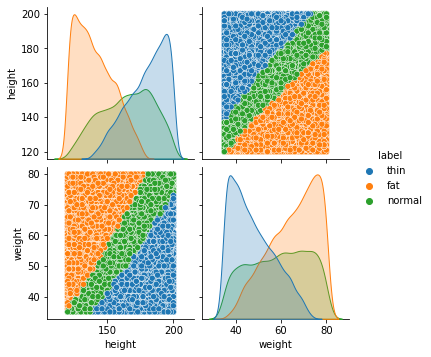

In [1]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

seed=0
np.random.seed(3)
tf.random.set_seed(3)

df = pd.read_csv('../data/bmi.csv')
print(df.head())
print(df.info())
print(df.describe())

sns.pairplot(df, hue='label');
plt.show()

In [2]:
dataset = df.values
X = dataset[:,0:2].astype(np.float32)
Y_obj = dataset[:,2]

e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)
Y_encoded = tf.keras.utils.to_categorical(Y)
print(Y)
print(Y_encoded)

[2 0 0 ... 0 1 0]
[[0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [3]:
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(3, activation='softmax')) 


model.compile(loss='categorical_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

In [4]:
model.fit(X, Y_encoded, epochs=100, batch_size=5)
print("\n Accuracy: %.4f" % (model.evaluate(X, Y_encoded)[1]))

Epoch 1/100
4000/4000 [==============================] - 3s 719us/step - loss: 0.7165 - accuracy: 0.7532
Epoch 2/100
4000/4000 [==============================] - 3s 720us/step - loss: 0.3984 - accuracy: 0.8099
Epoch 3/100
4000/4000 [==============================] - 3s 708us/step - loss: 0.3070 - accuracy: 0.8612
Epoch 4/100
4000/4000 [==============================] - 3s 702us/step - loss: 0.2276 - accuracy: 0.9021
Epoch 5/100
4000/4000 [==============================] - 3s 718us/step - loss: 0.1760 - accuracy: 0.9262
Epoch 6/100
4000/4000 [==============================] - 3s 715us/step - loss: 0.1561 - accuracy: 0.9336
Epoch 7/100
4000/4000 [==============================] - 3s 719us/step - loss: 0.1392 - accuracy: 0.9419
Epoch 8/100
4000/4000 [==============================] - 3s 730us/step - loss: 0.1343 - accuracy: 0.9430
Epoch 9/100
4000/4000 [==============================] - 3s 755us/step - loss: 0.1273 - accuracy: 0.9452
Epoch 10/100
4000/4000 [==============================]

4000/4000 [==============================] - 2s 579us/step - loss: 0.0508 - accuracy: 0.9784
Epoch 79/100
4000/4000 [==============================] - 2s 623us/step - loss: 0.0517 - accuracy: 0.9779
Epoch 80/100
4000/4000 [==============================] - 2s 587us/step - loss: 0.0516 - accuracy: 0.9796
Epoch 81/100
4000/4000 [==============================] - 2s 606us/step - loss: 0.0513 - accuracy: 0.9778
Epoch 82/100
4000/4000 [==============================] - 2s 585us/step - loss: 0.0503 - accuracy: 0.9787
Epoch 83/100
4000/4000 [==============================] - 2s 584us/step - loss: 0.0502 - accuracy: 0.9789
Epoch 84/100
4000/4000 [==============================] - 2s 580us/step - loss: 0.0464 - accuracy: 0.9797
Epoch 85/100
4000/4000 [==============================] - 3s 628us/step - loss: 0.0493 - accuracy: 0.9793
Epoch 86/100
4000/4000 [==============================] - 2s 589us/step - loss: 0.0504 - accuracy: 0.9793
Epoch 87/100
4000/4000 [==============================] - 2

In [5]:
x_test = np.array([[180, 40 ]])
y_predict = model.predict(x_test).flatten()

pred = np.argmax(y_predict)
print(e.inverse_transform([pred]))

x_test = np.array([[153, 65 ]])
y_predict = model.predict(x_test).flatten()

pred = np.argmax(y_predict)
print(e.inverse_transform([pred]))

['thin']
['fat']
